<a href="https://colab.research.google.com/github/AjinJayan/AJ/blob/master/how%20to%20make%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data=pd.read_csv('/content/chennai_house_price_prediction.csv')

In [7]:
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [8]:
data.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P03888,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [9]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [10]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [0]:
mode=data['N_BEDROOM'].mean()
data['N_BEDROOM'].fillna(mode,inplace=True)

In [0]:
mode=data['N_BATHROOM'].mean()
data['N_BATHROOM'].fillna(mode,inplace=True)

In [13]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [14]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [0]:
def overall(x):
  return (x['QS_BATHROOM']+x['QS_BEDROOM']+x['QS_ROOMS'])/3

In [0]:
data['QS_OVERALL']=data.apply(lambda x:overall(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'],axis=1)

In [17]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [0]:
temp=['AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']

In [19]:
for i in temp:
  print(data[i].value_counts())
  print('counts for ',i)
  print(' ')

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64
counts for  AREA
 
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64
counts for  SALE_COND
 
Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64
counts for  PARK_FACIL
 
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64
counts for  BUILDTYPE
 
AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64
counts for  UTILITY_AVAIL
 
Paved        256

In [0]:
data['AREA'].replace({'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','Karapakam':'Karapakkam','KKNagar':'KK Nagar','Velchery':'Velachery','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'},inplace=True)

In [0]:
data['SALE_COND'].replace({'Adj Land':'AdjLand','Partiall':'Partial','PartiaLl':'Partial','Ab Normal':'AbNormal'},inplace=True)

In [0]:
data['PARK_FACIL'].replace({'Noo':'No'},inplace=True)

In [0]:
data['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'},inplace=True)

In [0]:
data['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)

In [0]:
data['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)

In [26]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [0]:
data=pd.get_dummies(data.drop(['PRT_ID'],axis=1))

In [28]:
data.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACIL_No,PARK_FACIL_Yes,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,144400,7600000,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,304049,21717770,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,92114,13159200,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,77042,9630290,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,74063,7406250,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0


In [29]:
data.drop_duplicates().head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACIL_No,PARK_FACIL_Yes,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,144400,7600000,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,304049,21717770,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,92114,13159200,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,77042,9630290,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,74063,7406250,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0


DATA IS CLEANED

In [30]:
x=data.drop(['SALES_PRICE'],axis=1)
y=data['SALES_PRICE']
x.shape,y.shape

((7109, 40), (7109,))

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=None)

In [0]:
from sklearn.linear_model import LinearRegression 

In [0]:
lr=LinearRegression(normalize=True)

In [35]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
pred=lr.predict(x_test)

In [37]:
lr.coef_

array([ 3.73348291e+03, -3.84502667e+01,  2.34341657e+05, -3.76731243e+05,
        1.73161828e+05, -1.09393983e+05, -1.20473523e+05, -1.10786546e+05,
        3.99974503e+05,  2.58068782e+00, -1.16488982e+18, -1.16488982e+18,
       -1.16488982e+18, -1.16488982e+18, -1.16488982e+18, -1.16488982e+18,
       -1.16488982e+18, -1.93158819e+17, -1.93158819e+17, -1.93158819e+17,
       -1.93158819e+17, -1.93158819e+17, -2.41569287e+17, -2.41569287e+17,
        3.05743917e+17,  3.05743917e+17,  3.05743917e+17,  8.73539344e+16,
        8.73539344e+16,  8.73539344e+16,  8.73539344e+16,  1.41854697e+18,
        1.41854697e+18,  1.41854697e+18,  1.35190089e+17,  1.35190089e+17,
        1.35190089e+17,  1.35190089e+17,  1.35190089e+17,  1.35190089e+17])

In [0]:
from sklearn.metrics import mean_squared_log_error as rmsle

In [39]:
test_error=rmsle(pred,y_test)
test_error

0.007028283054149694

In [0]:
pred_train=lr.predict(x_train)

In [41]:
train_error=rmsle(pred_train,y_train)
train_error

0.00814147120277642

In [0]:
import matplotlib.pyplot as plt 
%matplotlib inline


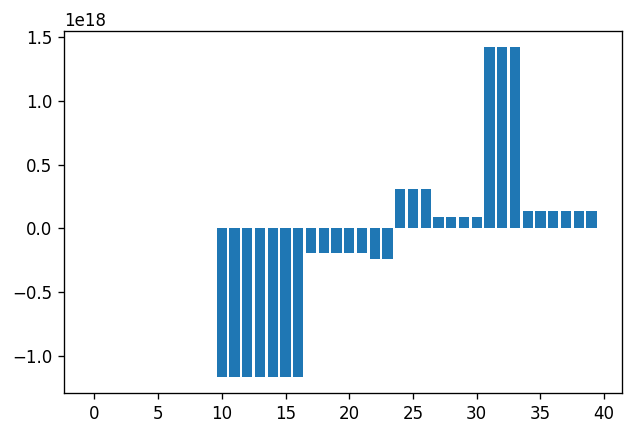

In [43]:
plt.figure(dpi=120,facecolor='w',edgecolor='b')
x_=range(len(x_train.columns))
y_=lr.coef_
plt.bar(x_,y_)
plt.xlabel=['Variables']
plt.ylabel=['coeff']
plt.tittle=['coeff bar diagram ']

In [44]:
coeff=pd.DataFrame({'variables':x.columns,'coeff':lr.coef_})
coeff.head()

,variables,coeff
0,INT_SQFT,3733.482914
1,DIST_MAINROAD,-38.450267
2,N_BEDROOM,234341.656702
3,N_BATHROOM,-376731.242995
4,N_ROOM,173161.827894


In [45]:
sig_var=coeff[coeff.coeff>0.5]
subset=data[sig_var['variables'].values]
subset.head()

,INT_SQFT,N_BEDROOM,N_ROOM,QS_OVERALL,COMMIS,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,1.0,3,4.330,144400,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,1986,2.0,5,3.765,304049,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,909,1.0,3,3.090,92114,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1855,3.0,5,4.010,77042,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
4,1226,1.0,3,3.290,74063,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0


In [0]:
train_x,test_x,train_y,test_y=train_test_split(subset,y,random_state=42)

In [47]:
lr=LinearRegression(normalize=True)
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
pred_train=lr.predict(train_x)

In [49]:
pred_test=lr.predict(test_x)
s_train=rmsle(pred_train,train_y)
s_test=rmsle(pred_test,test_y)
s_train,s_test

(0.024415025798925634, 0.023400353132976913)

In [50]:
lr.coef_

array([ 2.70959691e+03, -2.29900137e+06,  2.25141954e+06,  8.13921967e+04,
        2.55121000e+00, -4.29675165e+18, -4.29675165e+18, -4.29675165e+18,
       -8.33806342e+18, -8.33806342e+18, -8.33806342e+18, -8.33806342e+18,
       -1.17925935e+19, -1.17925935e+19, -1.17925935e+19,  6.88861782e+19,
        6.88861782e+19,  6.88861782e+19,  6.88861782e+19,  6.88861782e+19,
        6.88861782e+19])

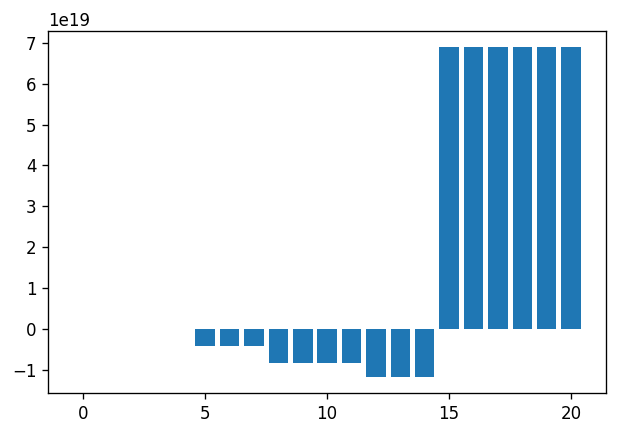

In [52]:
plt.figure(facecolor='w',edgecolor='b',dpi=120)
x_=range(len(train_x.columns))
y_=lr.coef_
plt.bar(x_,y_)
plt.xlabel=['variables']
plt.ylabel=['coeff']
plt.tittle=['coeff graph']



**checking prediction of linear model**

In [0]:
residuals=pd.DataFrame({'fitted':test_y,'predction':pred_test})
residuals['residuals']=residuals['fitted']-residuals['predction']

In [54]:
residuals.head()

,fitted,predction,residuals
457,12948200,12460032.0,488168.0
1876,7524750,8249344.0,-724594.0
6307,16434500,16572416.0,-137916.0
3182,6705750,8175616.0,-1469866.0
1188,15831550,14622720.0,1208830.0


In [57]:
test_x.shape

(1778, 21)

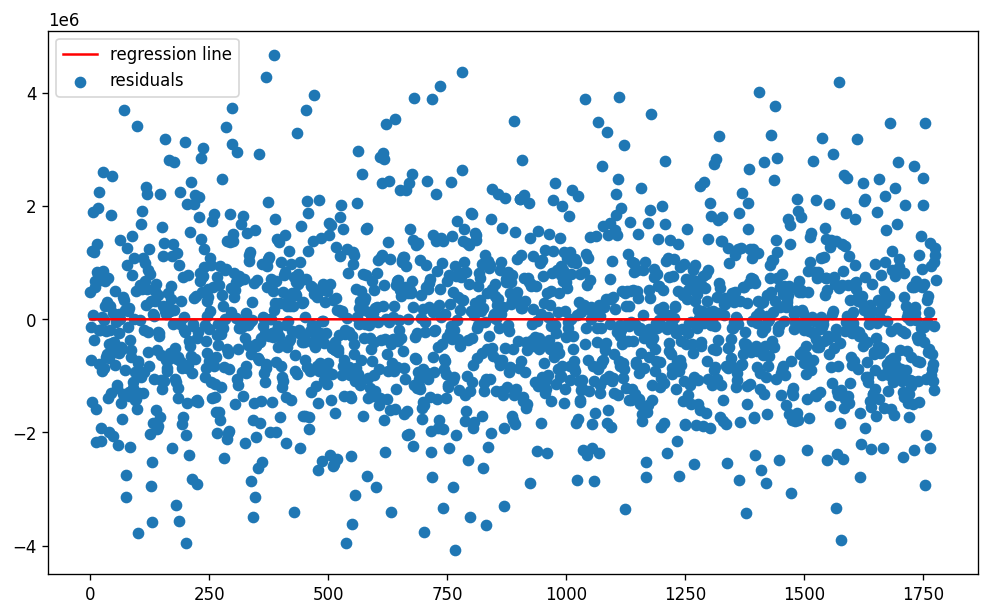

In [58]:
plt.figure(figsize=(10,6),dpi=120,facecolor='w',edgecolor='b')
f=range(0,1778)
k=[0 for i in range(0,1778)]
plt.scatter(f,residuals.residuals[:],label='residuals')
plt.plot(f,k,color='red',label='regression line')
plt.x_label=['fixed_points']
plt.y_label=['residuals']
plt.tittle=['residuals plot']
plt.ylim=[-400,400]
plt.legend()

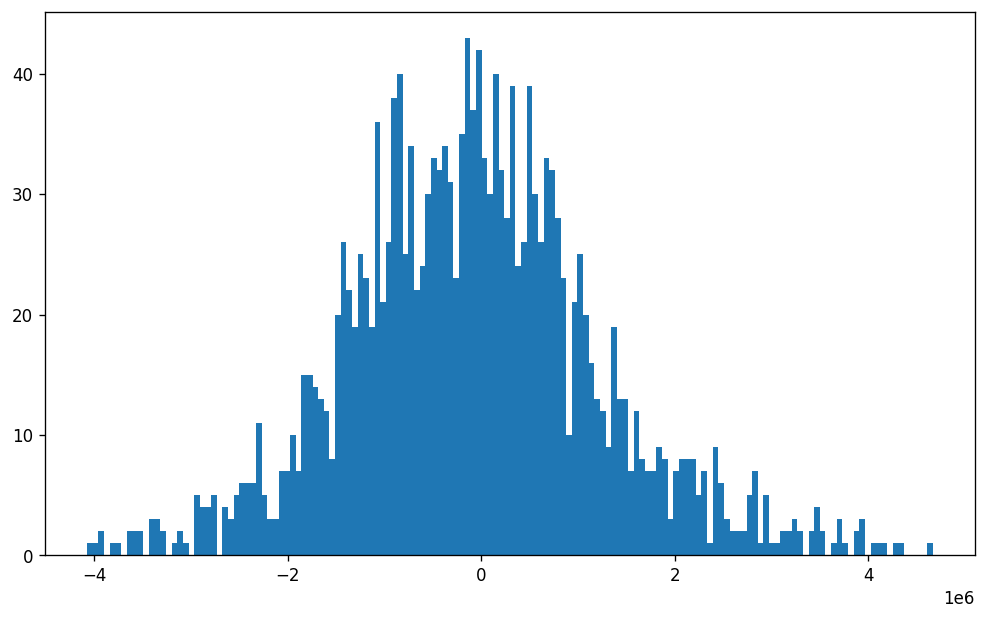

In [60]:
plt.figure(figsize=(10,6),dpi=120,facecolor='w',edgecolor='b')
plt.hist(residuals.residuals,bins=150)
plt.xlabel=['error']
plt.y_label=['frequency']
plt.tittle=['histogram']
plt.show()

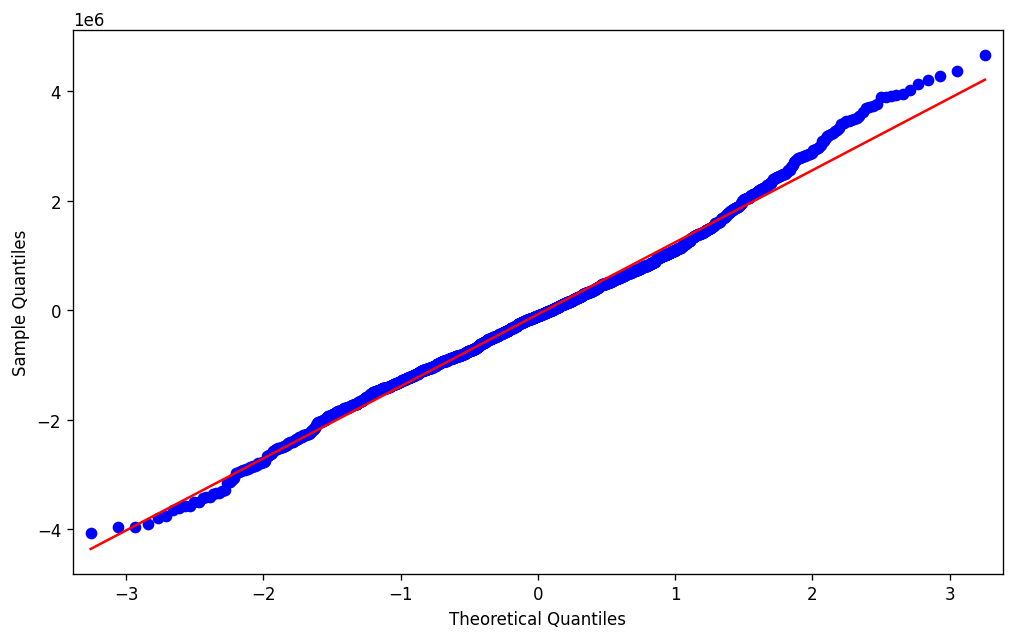

In [75]:
from statsmodels.graphics.gofplots import qqplot
fig,ax=plt.subplots(figsize=(10,6),dpi=120)
qqplot(residuals.residuals,line='s',ax=ax)
plt.y_label=['residuals']
plt.xlabel=['ideal scaled quatities']
plt.show()

VArience inflation factor 

In [0]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [81]:
from statsmodels.tools import add_constant
VIF=pd.Series([variance_inflation_factor(subset.values,i)for i in range(subset.shape[1])],index=subset.columns)
VIF

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


INT_SQFT                 11.577470
N_BEDROOM                 3.639764
N_ROOM                   14.374411
QS_OVERALL                1.001746
COMMIS                    1.931415
BUILDTYPE_Commercial           inf
BUILDTYPE_House                inf
BUILDTYPE_Others               inf
UTILITY_AVAIL_AllPub           inf
UTILITY_AVAIL_ELO              inf
UTILITY_AVAIL_NoSeWa           inf
UTILITY_AVAIL_NoSewr           inf
STREET_Gravel                  inf
STREET_No Access               inf
STREET_Paved                   inf
MZZONE_A                       inf
MZZONE_C                       inf
MZZONE_I                       inf
MZZONE_RH                      inf
MZZONE_RL                      inf
MZZONE_RM                      inf
dtype: float64